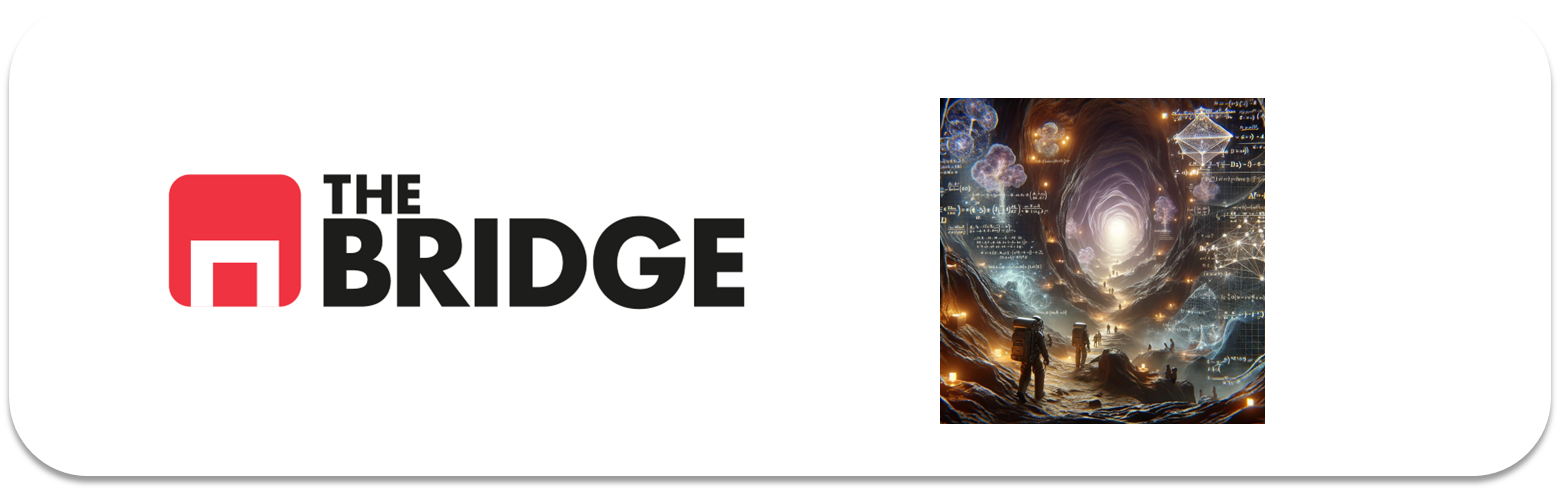

## PRACTICA OBLIGATORIA: **Introducción Deep Learning**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de modelado del dataset del titanic empleando y comparando dos modelos diferentes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [92]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Descripción y objetivo

El objetivo de la práctica es crear un modelo DL y compararlo con un modelo Random Forest para el dataset de titanic los dos con el mismo objetivo, predecir la supervivencia de un pasajero.  Se pide:  
1. Desarrollar el proceso de ML hasta crear los dos modelos DL y Random Forest. El primero debe tener una topología MLP (es decir una red densa) con un máximo de 3 capas ocultas y debes emplear sklearn para crearlo. No es necesario hacer una análisis/seleccion exahustivo. Escoge una métrica acorde al tipo de target del problema. 

2. Ambos modelos deben tener sus hiperparámetros optimizados, mediante GridSearch. Para ello: utiliza el grid de parámetros que creas conveniente para Random Forest y para el modelo DL, utiliza un grid con los hiperparámetros siguientes:'hidden_layer_sizes','activation', 'solver','alpha' y 'learning_rate'. Para los rangos del grid del modelo de DL guíate por lo visto en el workout y por los posibles valores que se indican en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier). Prueba por lo menos una topología con una sola capa oculta y otra con más de una capa oculta.   
NOTA: Incluye los valores por defecto de los hiperparámetros escogidos en cada caso dentro del grid de hiperparámetros. 
  

3. Compara los modelos respecto a sus métricas medias de accuracy, precision, recall y tiempos de entrenamiento (para ello tendrás que realizar un entrenamiento a parte del mejor modelo obtenido en la optimización de hiperparámetros) y decide cuál te quedarías argumentándolo.    

4. Para el mejor modelo DL obtenido, muestra su clasification report, y la matriz de confusión comentando el resultado.


In [93]:
# 1
df = pd.read_csv("./data/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [94]:
df.who.value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [96]:
df = df.drop(["deck", "embarked", "parch", "alive", "class", "who"], axis=1)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   fare         891 non-null    float64
 6   adult_male   891 non-null    bool   
 7   embark_town  889 non-null    object 
 8   alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(2)
memory usage: 50.6+ KB


In [98]:
age_median = df['age'].median()
df['age'].fillna(age_median, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   fare         891 non-null    float64
 6   adult_male   891 non-null    bool   
 7   embark_town  889 non-null    object 
 8   alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(2)
memory usage: 50.6+ KB


In [99]:
df.dropna(inplace=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   fare         889 non-null    float64
 6   adult_male   889 non-null    bool   
 7   embark_town  889 non-null    object 
 8   alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(2)
memory usage: 57.3+ KB


In [101]:
target = "survived"

In [102]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})


In [103]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

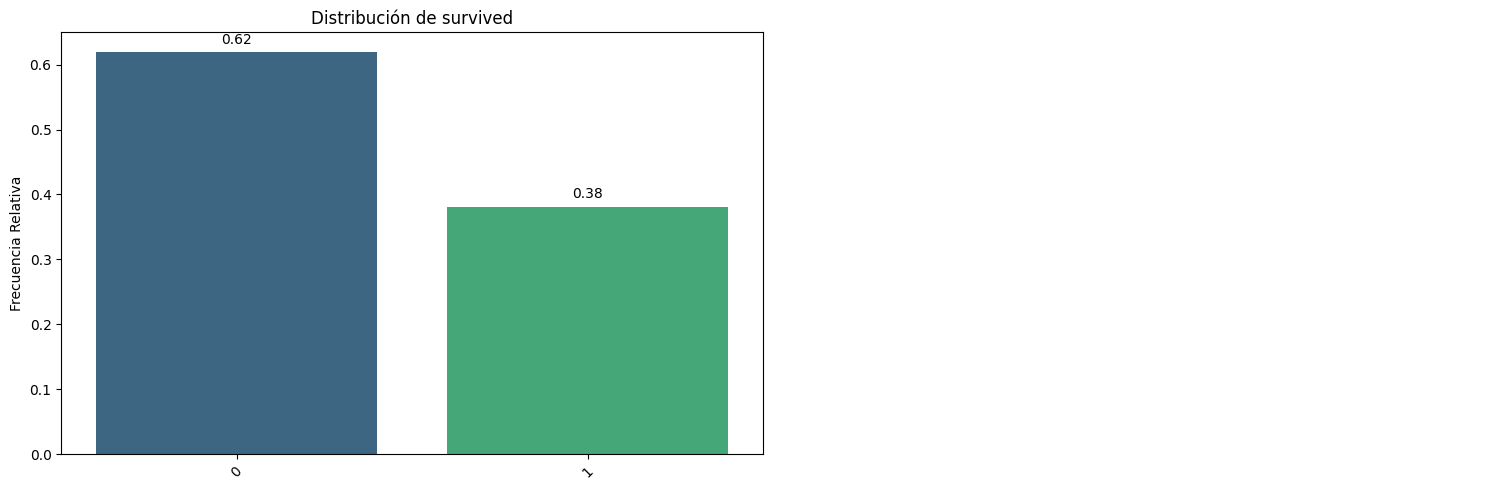

In [104]:
bt.pinta_distribucion_categoricas(train_set, [target], relativa= True, mostrar_valores= True)

desbalanceado

In [105]:
features_cat = train_set.select_dtypes(include = "object").columns.to_list()
if target in features_cat:
    features_cat.remove(target)
features_cat

['embark_town']

In [106]:
features_num = [col for col in train_set.columns if col not in features_cat and col != target]
features_num

['pclass', 'sex', 'age', 'sibsp', 'fare', 'adult_male', 'alone']

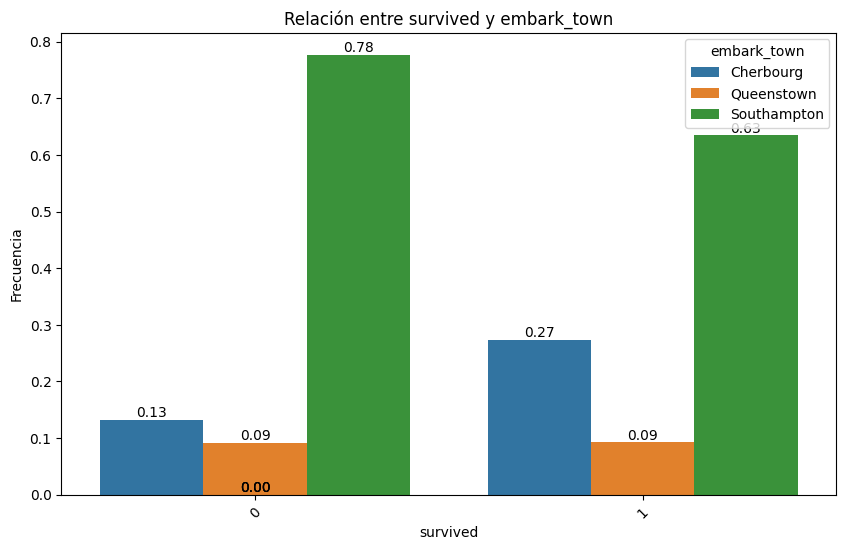

In [107]:
### Analizamos categóricas

for col in features_cat:
    bt.plot_categorical_relationship_fin(train_set, target, col, relative_freq= True, show_values= True)

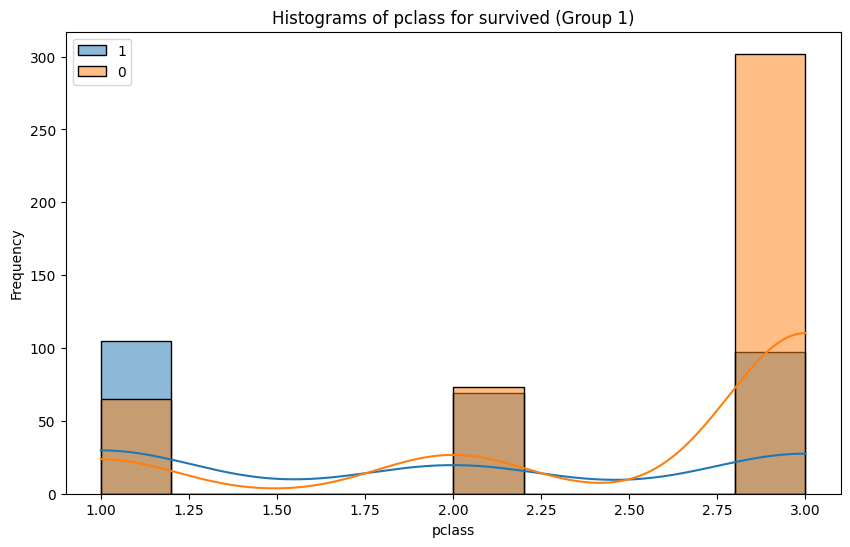

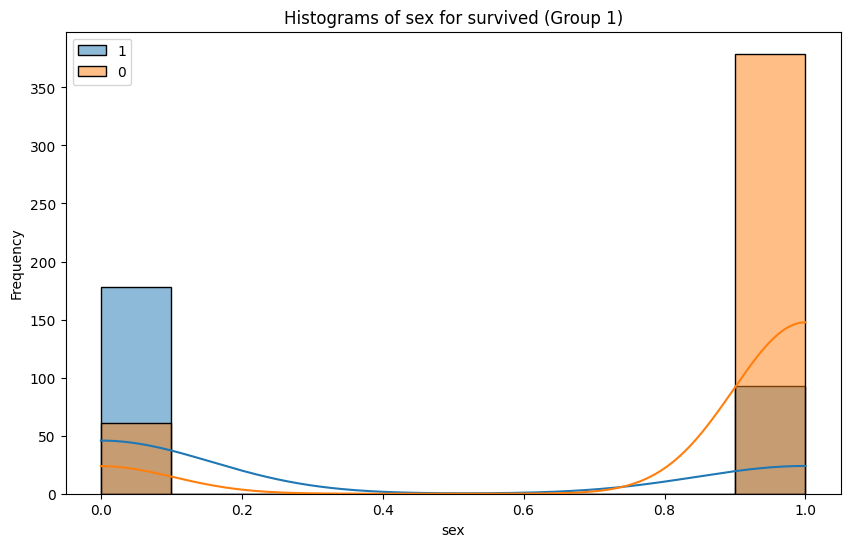

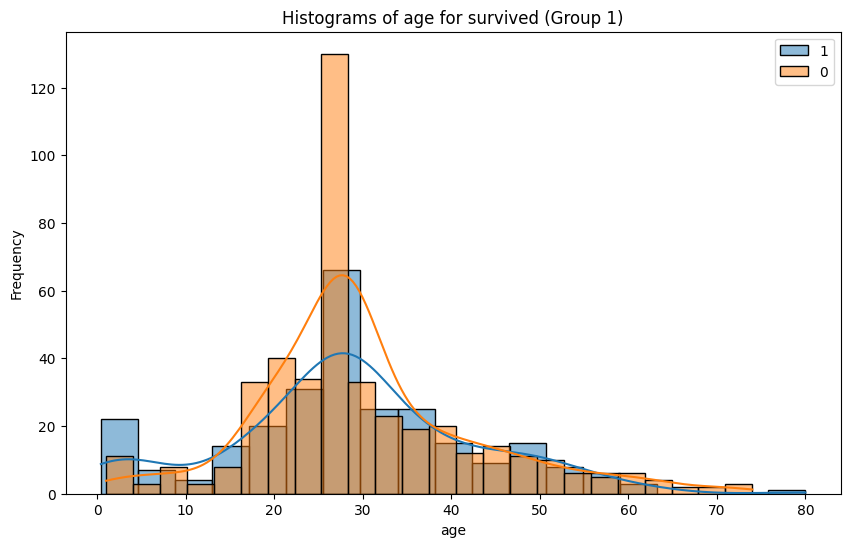

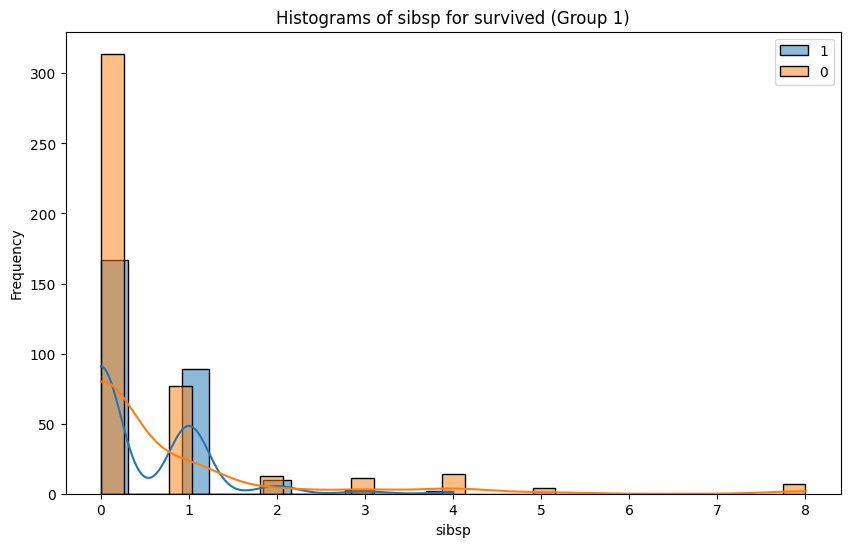

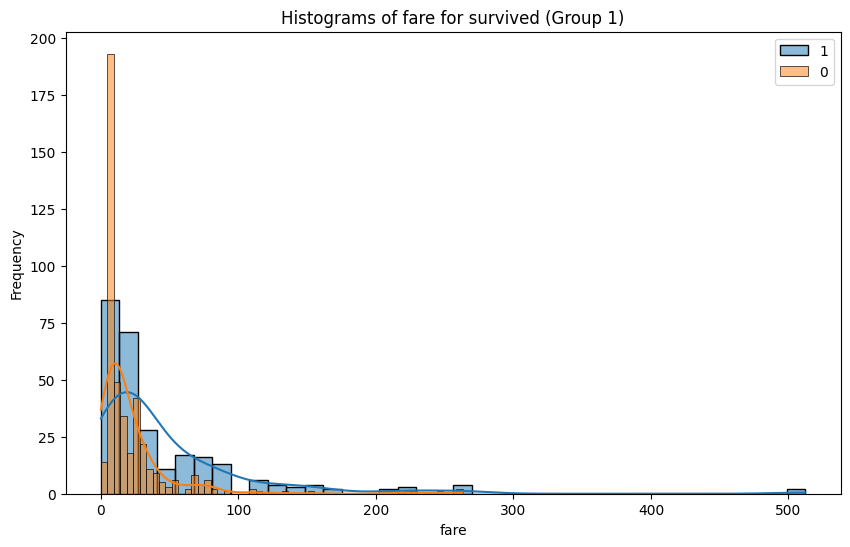

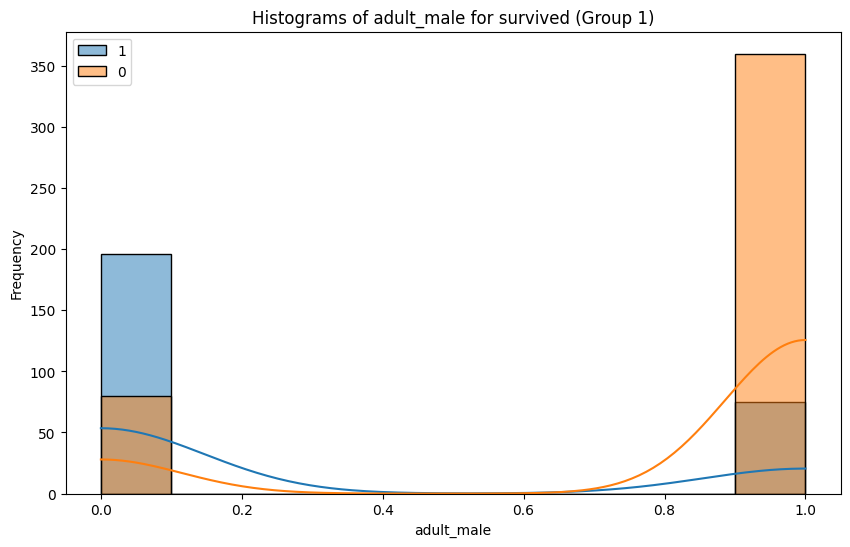

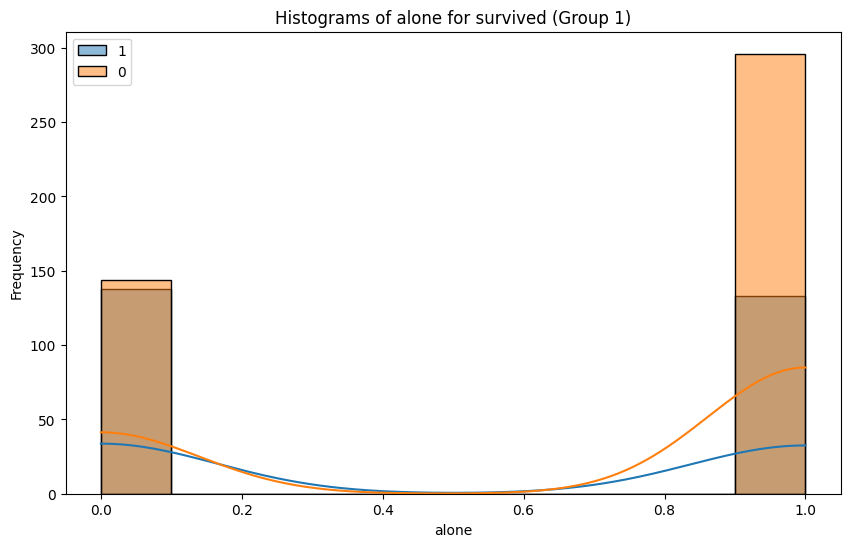

In [108]:
for col in features_num:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

me quedo con todo, por una vez, a ver lo que da.. vamoooooos


In [109]:
train_set = pd.get_dummies(train_set, columns = features_cat, dtype = int)
test_set = pd.get_dummies(test_set, columns = features_cat, dtype = int)

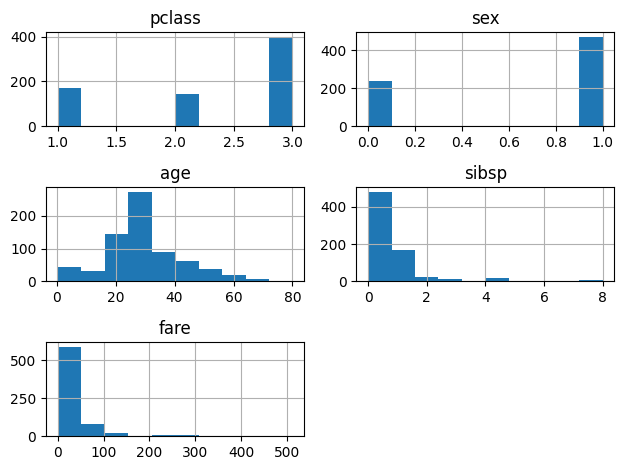

In [110]:
train_set[features_num].hist()
plt.tight_layout()

In [111]:

def apply_log_normalization(dataset, columns):
    for column in columns:
        dataset[column] = np.log(dataset[column] + 1)  # Agregar 1 para evitar log(0)
    return dataset

# Definir las columnas a normalizar
columns_to_normalize = ['sibsp', 'fare']

# Aplicar normalización a train_set y test_set
train_set_normalized = apply_log_normalization(train_set, columns_to_normalize)
test_set_normalized = apply_log_normalization(test_set, columns_to_normalize)

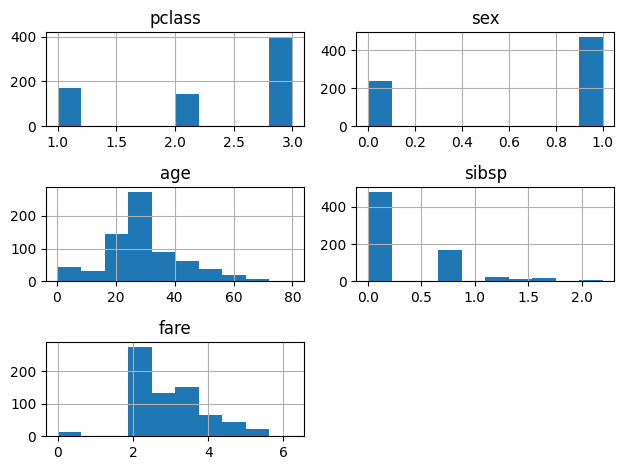

In [112]:
train_set_normalized[features_num].hist()
plt.tight_layout()

In [113]:
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [114]:
scaler = StandardScaler()
train_set_scaled[features_num] = scaler.fit_transform(train_set_scaled[features_num])
test_set_scaled[features_num] = scaler.transform(test_set_scaled[features_num])

In [115]:
X_train = train_set_scaled.drop(columns=[target])
X_test =  test_set_scaled.drop(columns=[target])

y_train = train_set_scaled[target]
y_test = test_set_scaled[target]

In [116]:
X_train

,pclass,sex,age,sibsp,fare,adult_male,alone,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
708,-1.584104,-1.405310,-0.571868,-0.613685,2.118191,-1.255423,0.810767,0,0,1
240,0.812275,-1.405310,-0.115088,0.840097,-0.220452,-1.255423,-1.233400,1,0,0
382,0.812275,0.711587,0.189432,-0.613685,-0.781233,0.796544,0.810767,0,0,1
792,0.812275,-1.405310,-0.115088,3.994696,1.330506,-1.255423,-1.233400,0,0,1
683,0.812275,0.711587,-1.180908,3.144288,0.935008,-1.255423,-1.233400,0,0,1
...,...,...,...,...,...,...,...,...,...,...
107,0.812275,0.711587,-0.115088,-0.613685,-0.798546,0.796544,0.810767,0,0,1
271,0.812275,0.711587,-0.343478,-0.613685,-3.016964,0.796544,0.810767,0,0,1
862,-1.584104,-1.405310,1.407511,-0.613685,0.346771,-1.255423,0.810767,0,0,1
436,0.812275,-1.405310,-0.647998,1.690506,0.625407,-1.255423,-1.233400,0,0,1


In [118]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy del modelo Random Forest:", accuracy_rf)

print(classification_report(y_test, y_pred_rf))

Accuracy del modelo Random Forest: 0.7865168539325843
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       109
           1       0.70      0.78      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.79      0.79      0.79       178



In [121]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'class_weight' : [None, 'balanced'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.8438688072490889


In [122]:

# Registramos el tiempo de entrenamiento y predicción


start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()

train_time = end - start



In [125]:
print("El GridSearch ha durado", train_time, "segundos")

El GridSearch ha durado 79.27157711982727 segundos


In [127]:
# Creamos un modelo de red neuronal

mlp = MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=1000, random_state=42)

# Registramos el tiempo de entrenamiento y predicción
start = time.time()
mlp.fit(X_train, y_train)
end = time.time()

train_time = end - start

start = time.time()
y_pred = mlp.predict(X_test)
end = time.time()

pred_time = end - start

# Guardamos las métricas de evaluación en un dataframe

mlp_metrics = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                            'precision': precision_score(y_test, y_pred, average = "macro"),
                            'recall': recall_score(y_test, y_pred, average = "macro"),
                            'train_time': train_time,
                            'pred_time': pred_time}, index=['mlp']
                            )
mlp_metrics.head()

,accuracy,precision,recall,train_time,pred_time
mlp,0.814607,0.804245,0.808736,0.491357,0.001503


mas rapido...

In [130]:
mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],  # Topología de la red
    'activation': ['relu', 'tanh', 'logistic'],  # Función de activación
    'solver': ['adam', 'sgd'],  # Optimizador
    'alpha': [0.0001, 0.001, 0.01],  # Tasa de regularización
    'learning_rate': ['constant', 'adaptive'],  # Tasa de aprendizaje
}

In [131]:
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=mlp_param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search_mlp.fit(X_train, y_train)
# Print the best parameters and best score
print("Best Parameters:", grid_search_mlp.best_params_)
print("Best Score:", grid_search_mlp.best_score_)

Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate': 'constant', 'solver': 'sgd'}
Best Score: 0.8283758495026101


In [133]:

# Registramos el tiempo de entrenamiento y predicción


start_mlp = time.time()
grid_search_mlp.fit(X_train, y_train)
end_mlp = time.time()

train_time_mlp = end_mlp - start_mlp



In [135]:
print("El GridSearch ha durado", train_time_mlp, "segundos")

El GridSearch ha durado 262.9469335079193 segundos


-> mucho mas tiempo... son un poco mas de 6 minutos

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
import time
rf_accuracy = cross_val_score(grid_search, X_train, y_train, cv=5, scoring='accuracy')
rf_precision = cross_val_score(grid_search, X_train, y_train, cv=5, scoring='precision')
r_recall = cross_val_score(grid_search, X_train, y_train, cv=5, scoring='recall')


In [ ]:
print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)

In [ ]:
mlp_accuracy = cross_val_score(grid_search_mlp, X_train, y_train, cv=5, scoring='accuracy')
mlp_precision = cross_val_score(grid_search_mlp, X_train, y_train, cv=5, scoring='precision')
mlp_recall = cross_val_score(grid_search_mlp, X_train, y_train, cv=5, scoring='recall')


In [ ]:
print("Deep Learning:")
print("Accuracy:", mlp_accuracy)
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)

me quedo con el Random forest porque me da resultados similares, pero mas rapidamente.